In [10]:
 
model = (;
    cbar = 0.8, 
    wvec=[0.6, 1.0, 1.4],
    pvec=ones(3)/3,
    λ = 0.01,
    β = 0.96,
)

# control = accept or rejec the wage offer
# state = unemployed x wage or employed

(cbar = 0.8, wvec = [0.6, 1.0, 1.4], pvec = [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], λ = 0.01, β = 0.96)

In [11]:
V_U_0 = [0.3,2.4, 2.0]
V_E_0 = [0.3, - 476, 2.0]
x_0 = [true, false, true]

3-element Vector{Bool}:
 1
 0
 1

In [146]:
function value_update(V_U, V_E, x, p)

    (; cbar, λ, β, pvec, wvec) = p
    
    n_V_U = zeros(3)
    n_V_E = zeros(3)

    # unemployed
    for i in 1:3
        if x[i] # accept
            cont = V_E[i]
        else # reject
            cont = sum(pvec[j]*V_U[j] for j in 1:3)
        end
        n_V_U[i] = log(cbar) + β*cont
    end

    # employed
    for i in 1:3
        Expected_V_U = sum(pvec[j]*V_U[j] for j in 1:3)

        cont = (1-λ)*V_E[i] + λ*Expected_V_U

        n_V_E[i] = log(wvec[i]) + β*cont
    end

    return (; n_V_U, n_V_E)
end

value_update (generic function with 1 method)

In [147]:
value_update(V_U_0, V_E_0, x_0, model)

(n_V_U = [-0.2231435513142097, -0.2231435513142097, -0.2231435513142097], n_V_E = [-0.5108256237659907, 0.0, 0.3364722366212129])

In [148]:
function policy_eval(x, p; τ=1e-8, K=500)
    
    V_U_0 = zeros(3)
    V_E_0 = zeros(3)
    η = [0.0]

    global V_U, V_E, η, kend

    for k in 1:K

        n_V = value_update(V_U_0, V_E_0, x, p)

        ηU = maximum(abs, n_V.n_V_U-V_U_0)
        ηE = maximum(abs, n_V.n_V_E-V_E_0)
        push!(η,max(ηU, ηE))
        
        V_U_0 = n_V.n_V_U
        V_E_0 = n_V.n_V_E
    
        @show (k, η[end], V_U_0, V_E_0)

        if η[end] < τ
            kend = k
            V_U = V_U_0
            V_E = V_E_0
            break
        end

    end

    return (; kend, η, V_U, V_E)
end

policy_eval (generic function with 1 method)

In [149]:
res = policy_eval([false, false, false], model)

(k, η[end], V_U_0, V_E_0) = (1, 0.5108256237659907, [-0.2231435513142097, -0.2231435513142097, -0.2231435513142097], [-0.5108256237659907, 0.0, 0.3364722366212129])
(k, η[end], V_U_0, V_E_0) = (2, 0.48763085091981395, [-0.437361360575851, -0.437361360575851, -0.437361360575851], [-0.9984564746858047, -0.0021421780926164135, 0.6541132722133972])
(k, η[end], V_U_0, V_E_0) = (3, 0.46550085168310296, [-0.6430104574670267, -0.6430104574670267, -0.6430104574670267], [-1.4639573263689076, -0.0062345951207508086, 0.9539428214712975])
(k, η[end], V_U_0, V_E_0) = (4, 0.4443862407697763, [-0.8404335904825552, -0.8404335904825552, -0.8404335904825552], [-1.908343567138684, -0.012098259594445023, 1.2369265937558505])
(k, η[end], V_U_0, V_E_0) = (5, 0.42423994530454445, [-1.0299597981774626, -1.0299597981774626, -1.0299597981774626], [-2.3325835124432284, -0.019566348387193077, 1.5039791088581407])
(k, η[end], V_U_0, V_E_0) = (6, 0.4050170956113104, [-1.211904957564574, -1.211904957564574, -1.211904

Excessive output truncated after 524300 bytes.


(k, η[end], V_U_0, V_E_0) = (295, 1.4606769944691678e-6, [-5.5785559326493415, -5.5785559326493415, -5.5785559326493415], [-11.37859595467594, -1.0796953771432474, 5.704017010881714])
(k, η[end], V_U_0, V_E_0) = (296, 1.4013674949353572e-6, [-5.578557246657577, -5.578557246657577, -5.578557246657577], [-11.378597356043436, -1.0796966233903758, 5.704015866809759])
(k, η[end], V_U_0, V_E_0) = (297, 1.3444741480128641e-6, [-5.578558508105483, -5.578558508105483, -5.578558508105483], [-11.378598700517584, -1.0796978204381258, 5.704014766869295])
(k, η[end], V_U_0, V_E_0) = (298, 1.2898981296416423e-6, [-5.578559719095473, -5.578559719095473, -5.578559719095473], [-11.378599990415713, -1.0796989702222073, 5.704013709375978])
(k, η[end], V_U_0, V_E_0) = (299, 1.2375446871715212e-6, [-5.578560881645863, -5.578560881645863, -5.578560881645863], [-11.3786012279604, -1.0797000746025023, 5.704012692708826])
(k, η[end], V_U_0, V_E_0) = (300, 1.187322954621095e-6, [-5.578561997694238, -5.578561997

(kend = 416, η = [0.0, 0.5108256237659907, 0.48763085091981395, 0.46550085168310296, 0.4443862407697763, 0.42423994530454445, 0.4050170956113104, 0.3866749211991056, 0.3691726516965419, 0.35247142249774743  …  1.4456587038580437e-8, 1.3875364857085515e-8, 1.3317535518808654e-8, 1.2782161107338652e-8, 1.2268335680687414e-8, 1.1775187047646796e-8, 1.1301883873215957e-8, 1.0847628573174006e-8, 1.0411651985009485e-8, 9.993215144277201e-9], V_U = [-5.5785885476985655, -5.5785885476985655, -5.5785885476985655], V_E = [-11.378630327263751, -1.079726628939642, 5.703987814698073])

In [150]:
using Plots

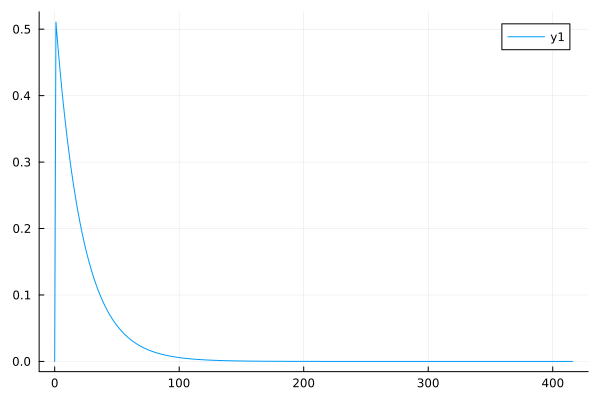

In [151]:
plot(0:res.kend,η)

In [177]:
    # value_update: updates the value function
    # policy_eval: for each state, evaluate ONE policy, find the best value function associated with the given policy
    # need to find best policy now: policy iteration 
    
    # bellman_step: different, find policy function that max current value function and update VF 
    # VFI based on bellman step 
    

    function bellman_step(V_U, V_E, p)

        (; cbar, λ, β, pvec, wvec) = p
        
        n_V_U = zeros(3)
        n_V_E = zeros(3)
        n_x = zeros(Bool, 3)
    
        # unemployed
        for i in 1:3
            cont_E = V_E[i] # accept

            cont_U = sum(pvec[j]*V_U[j] for j in 1:3) # reject

            cont = max(cont_E, cont_U)
            n_V_U[i] = log(cbar) + β*cont 

            if cont == cont_E
                n_x[i] = true
            else
                n_x[i] = false
            end

        end
    
        # employed
        for i in 1:3
            Expected_V_U = sum(pvec[j]*V_U[j] for j in 1:3)
    
            cont = (1-λ)*V_E[i] + λ*Expected_V_U
    
            n_V_E[i] = log(wvec[i]) + β*cont
        end
    
        return (; n_V_U, n_V_E, n_x)
    end

bellman_step (generic function with 2 methods)

In [178]:
V_U_0 = [0.3,2.4, 2.0]
V_E_0 = [0.3, - 476, 2.0]
x_0 = [true, false, true]

3-element Vector{Bool}:
 1
 0
 1

In [179]:
bellman_step(V_U_0, V_E_0, x_0, model)

(n_V_U = [1.28085644868579, 1.28085644868579, 1.6968564486857902], n_V_E = [-0.21066562376599074, -452.37536, 2.2523122366212127], n_x = Bool[0, 0, 1])

In [180]:
distance(a::Tuple{Vector, Vector}, b::Tuple{Vector, Vector})  = max(
    maximum(abs.(a[1]-b[1])),
    maximum(abs.(a[2]-b[2])),
)

distance (generic function with 1 method)

In [181]:
function value_function_iteration(V_U_0, V_E_0, x_0, p; N=1000, τ=1e-8)
    
    local  V_U_1, V_E_1, x_1

    for n in 1:N 

        res = bellman_step(V_U_0, V_E_0, p)
        x_1 = res.n_x
        V_U_1 = res.n_V_U
        V_E_1 = res.n_V_E

        η = distance( (V_U_0, V_E_0), (V_U_1, V_E_1))

        @show (n, η, x_1)
        
        if η < τ
            break
        end

        V_U_0 = V_U_1
        V_E_0 = V_E_1 
        
    end

    return (; V_U_1, V_E_1, x_1)
end

value_function_iteration (generic function with 1 method)

In [182]:

V_U_0 = zeros(3)
V_E_0 = zeros(3)

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [183]:
VU, VE, X = value_function_iteration(V_U_0, V_E_0, x_0, model)

(V_U_1 = [6.049790992670206, 6.049790992670206, 7.503338493801174], V_E_1 = [-9.034199339279674, 1.2647043614819962, 8.048418806725287], x_1 = Bool[0, 0, 1])

In [184]:
VE[end]

8.048418806725287

In [185]:
function policy_eval(x, p; τ=1e-8, K=500)
    
    V_U_0 = zeros(3)
    V_E_0 = zeros(3)
    η = [0.0]

    local V_U, V_E, η, kend

    for k in 1:K

        n_V = value_update(V_U_0, V_E_0, x, p)

        ηU = maximum(abs, n_V.n_V_U-V_U_0)
        ηE = maximum(abs, n_V.n_V_E-V_E_0)
        η = max(ηU, ηE)
        
        V_U_0 = n_V.n_V_U
        V_E_0 = n_V.n_V_E
    
        # @show (k, η)

        if η < τ
            kend = k
            V_U = V_U_0
            V_E = V_E_0
            break
        end

    end

    return (; V_U, V_E)
end

policy_eval (generic function with 1 method)

In [186]:
policy_eval([false, false, true], model)

(V_U = [6.049790992524931, 6.049790992524931, 7.503338493655899], V_E = [-9.034199339424942, 1.264704361336724, 8.048418806580012])

In [187]:
function policy_iteration(p; N=1000, τ=1e-8)
    
    x0 = zeros(Bool, 3)
    V_U_0, V_E_0 = policy_eval(x0, p)

    local V_U_1, V_E_1, x1 

    for n in 1:N 
        
        V_U_1, V_E_1, x1 = bellman_step(V_U_0, V_E_0, p)

        V_U_0, V_E_0 = policy_eval(x1, p)

        @show(n, x1)

        if x1 == x0
            break
        end 

        x0 = x1

    end

    return V_U_0, V_E_0, x1

end

policy_iteration (generic function with 1 method)

In [188]:
policy_iteration(model)

([6.049790992524931, 6.049790992524931, 7.503338493655899], [-9.034199339424942, 1.264704361336724, 8.048418806580012], Bool[0, 0, 1])